<a href="https://colab.research.google.com/github/salasemilio1/Salas-Projects/blob/main/Spam_Detection_EmilioSalas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

How is spam detected from regular email?
This project uses a UCI database with 5572 messages, each with a ham or spam label, and we will implement and compare **3** classification algorithms and see how they perform detecting spam.

**THANKS!!**

#**Import data**

In [ ]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)
df = pd.read_csv(f'{path}/spam.csv', encoding='latin-1')
print("Dataframe shape: ", df.shape)
df.head()

Path to dataset files: /root/.cache/kagglehub/datasets/uciml/sms-spam-collection-dataset/versions/1
Dataframe shape:  (5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#**Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data processing
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
from collections import Counter
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
# Model Building

# Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Splitting data
from sklearn.model_selection import train_test_split

# Accuracy Measures
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

# Models we will be using
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


#**Data Cleaning**

In [ ]:
df.shape
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

# renaming columns
df.rename(columns={'v1': 'result', 'v2': 'emails'}, inplace=True)
# dropping duplicates from the dataset
data = df.drop_duplicates(keep='first') # new data frame with dropping duplicates
data

,result,emails
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


#**Data Exploration**

For our data exploration, we will be distinguishing and learning a bit about our spam and ham emails. We will plot the distribution between the amount of spam emails and ham emails. Look into the average number of words in spam and ham emails, and average sentence length of both spam and ham messages.

**Average Character Length for Spam and Ham**

<ipython-input-222-7c9707afb9c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['length'] = data['emails'].apply(len)
<ipython-input-222-7c9707afb9c1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Spam', 'Ham'], y=[average_length_spam, average_length_ham], palette='bright')


Average spam message length (characters):  137.89127105666157
Average ham message length (characters):  70.45925597874225


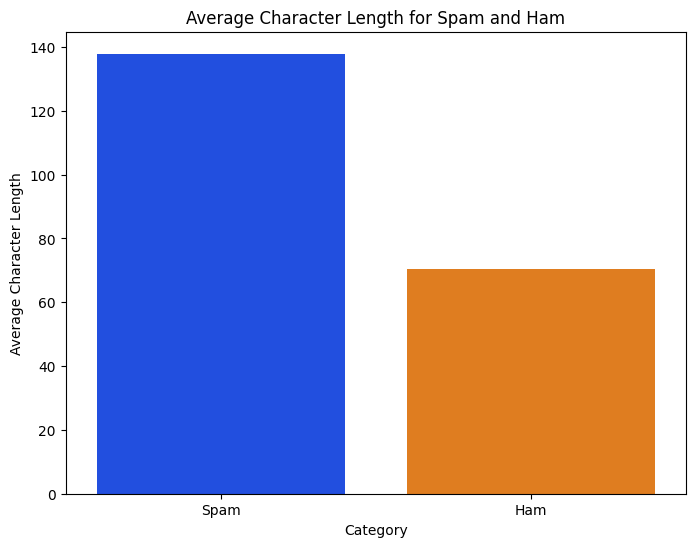

,result,emails,length,num_words,sentence_count,transform_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah nt think goe usf live around though


In [ ]:
data['length'] = data['emails'].apply(len)

average_length_spam = data[data['result'] == 'spam']['length'].mean()
average_length_ham = data[data['result'] == 'ham']['length'].mean()

# Plotting
print("Average spam message length (characters): ", average_length_spam)
print("Average ham message length (characters): ", average_length_ham)
plt.figure(figsize=(8, 6))
sns.barplot(x=['Spam', 'Ham'], y=[average_length_spam, average_length_ham], palette='bright')
plt.title('Average Character Length for Spam and Ham')
plt.xlabel('Category')
plt.ylabel('Average Character Length')
plt.show()
plt
data.head()

**Average Number of Words in Spam and Ham Messages**

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
<ipython-input-223-adabe2047bb1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_words'] = data['emails'].apply(word_tokenize).apply(len)


Average Words of Spam Emails: 27.6676875957121
Average Words of Ham Emails: 17.12378210806023


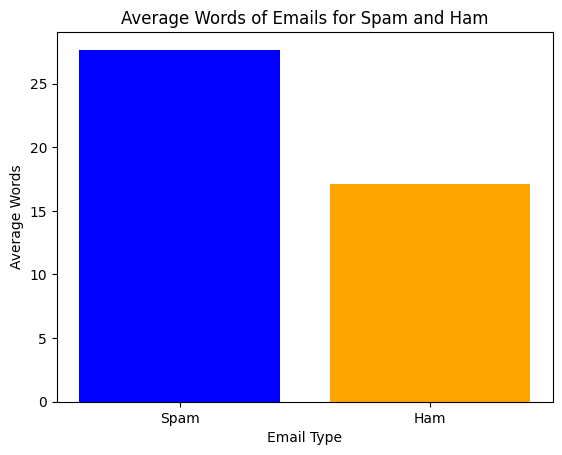

In [ ]:
import nltk

nltk.download('punkt_tab') # downloads the missing data file
data['num_words'] = data['emails'].apply(word_tokenize).apply(len)

avg_word_spam = data[data['result'] == 'spam']['num_words'].mean()
avg_word_ham = data[data['result'] == 'ham']['num_words'].mean()
print("Average Words of Spam Emails:", avg_word_spam)
print("Average Words of Ham Emails:", avg_word_ham)

# Plotting the graph
plt.bar(['Spam', 'Ham'], [avg_word_spam, avg_word_ham], color=['Blue', 'orange'])
plt.title('Average Words of Emails for Spam and Ham')
plt.xlabel('Email Type')
plt.ylabel('Average Words')
plt.show()

**Average Number of Sentences in Spam vs Ham**

<ipython-input-224-cfc0b510810e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentence_count'] = data['emails'].apply(lambda x: len(sent_tokenize(x)))
<ipython-input-224-cfc0b510810e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Spam', 'Ham'], y=[average_sentences_spam, average_sentences_ham], palette='bright')


Average number of sentences in spam messages: 2.970903522205207
Average number of sentences in ham messages: 1.8201948627103632


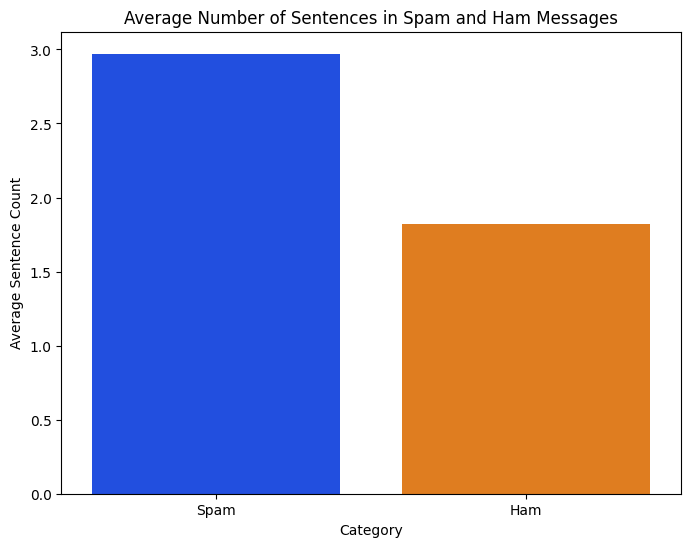

In [ ]:
# prompt: get me the average number of sentences in spam vs ham messages and plot them

# Calculate the average number of sentences for spam and ham messages
data['sentence_count'] = data['emails'].apply(lambda x: len(sent_tokenize(x)))

average_sentences_spam = data[data['result'] == 'spam']['sentence_count'].mean()
average_sentences_ham = data[data['result'] == 'ham']['sentence_count'].mean()

print("Average number of sentences in spam messages:", average_sentences_spam)
print("Average number of sentences in ham messages:", average_sentences_ham)

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=['Spam', 'Ham'], y=[average_sentences_spam, average_sentences_ham], palette='bright')
plt.title('Average Number of Sentences in Spam and Ham Messages')
plt.xlabel('Category')
plt.ylabel('Average Sentence Count')
plt.show()

#**Data Processing**

We will first need to clean the data before we implement our mdodel. We will first make all characters in the data lowercase. Then, we will remove all special characters.

In [ ]:
# prompt: Make data lowercase, tokenize, remove special characters, remove punctuation

# Making all of the text lowercase
data['transform_text'] = data['emails'].str.lower()

# Tokenization of data
data['transform_text'] = data['transform_text'].apply(word_tokenize)

# Removing special characters
data['transform_text'] = data['transform_text'].apply(lambda x: [re.sub(r'[^a-zA-Z0-9\s]', '', word) for word in x])

# Removing stop words and punctuation
stop_words = set(stopwords.words('english'))
data['transform_text'] = data['transform_text'].apply(lambda x: [word for word in x if word not in stop_words and word not in string.punctuation])

# Stemming
ps = PorterStemmer()
data['transform_text'] = data['transform_text'].apply(lambda x: [ps.stem(word) for word in x])

# Convert the preprocessed text back to string, rather than in a list
data['transform_text'] = data['transform_text'].apply(lambda x: ' '.join(x))

# Display the preprocessed data
data.head()

<ipython-input-225-a2a171d2aba7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transform_text'] = data['emails'].str.lower()
<ipython-input-225-a2a171d2aba7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transform_text'] = data['transform_text'].apply(word_tokenize)
<ipython-input-225-a2a171d2aba7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

,result,emails,length,num_words,sentence_count,transform_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah nt think goe usf live around though


**Most Common Words in Spam Messages**

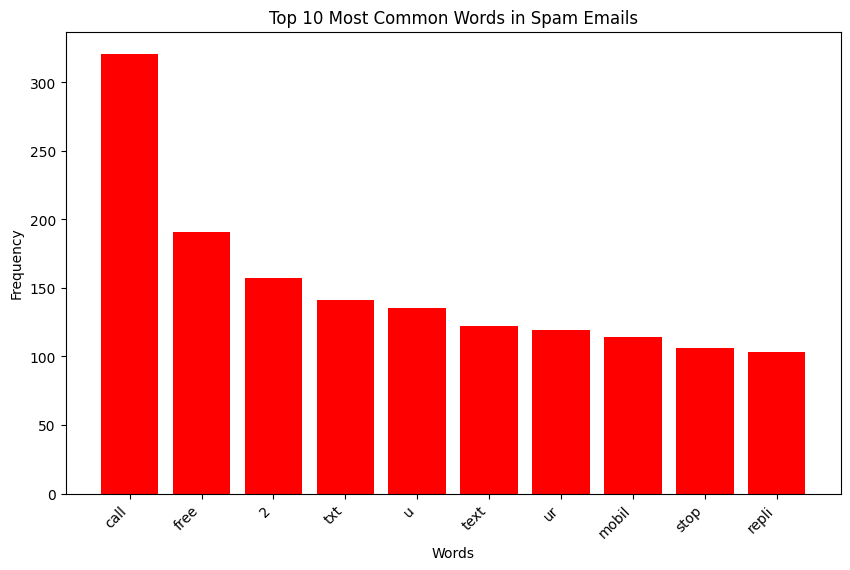

In [ ]:
# prompt: plot the 10 most common words in spam emails

# Most common words in Spam Emails
spam_words = ' '.join(list(data[data['result'] == 'spam']['transform_text']))
spam_word_counts = Counter(spam_words.split())
spam_common_words = spam_word_counts.most_common(10)

# Plotting the most common words
plt.figure(figsize=(10, 6))
plt.bar(*zip(*spam_common_words), color='r')
plt.title('Top 10 Most Common Words in Spam Emails')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

As we can see, call is by far the most used word in spam messages. This word will likely pull a lot of weight in the model, meaning when 'call' and other of these words are detected in the model, they will be flagged unless their other properties such as number of words and average number of sentences are much more in line with ham messages.

**Most Common Words in Ham Messages**

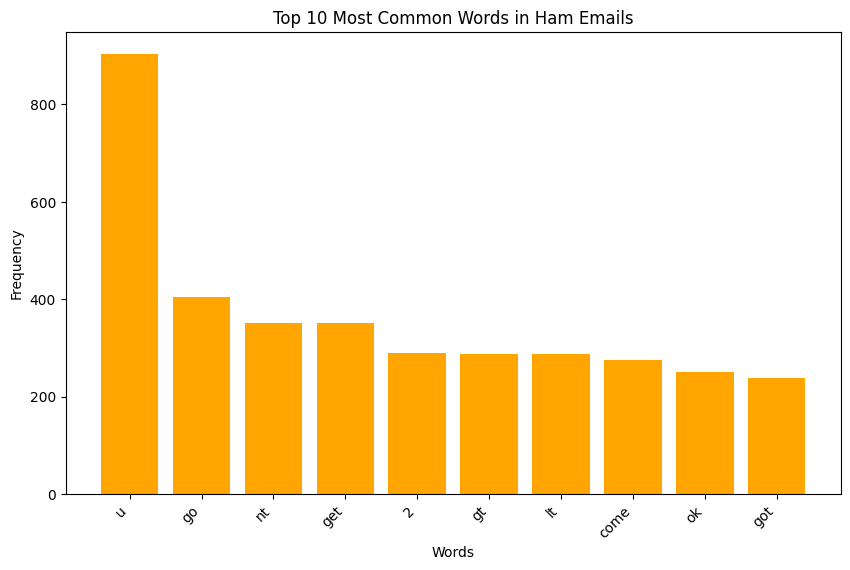

In [ ]:
# prompt: plot the 10 most common words in ham messages in the color orange

import matplotlib.pyplot as plt
from collections import Counter

# Assuming 'data' DataFrame from the previous code is available

# Most common words in Ham Emails
ham_words = ' '.join(list(data[data['result'] == 'ham']['transform_text']))
ham_word_counts = Counter(ham_words.split())
ham_common_words = ham_word_counts.most_common(10)

# Plotting the most common words
plt.figure(figsize=(10, 6))
plt.bar(*zip(*ham_common_words), color='orange') # Plot in orange color
plt.title('Top 10 Most Common Words in Ham Emails')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

#**Label Encoding and Vectorization**

In [ ]:
# prompt: Encode the data and vectorize it in order to apply machine learning models. also split the data using an 80/20 split

# Label Encoding
encoder = LabelEncoder()
data['result'] = encoder.fit_transform(data['result'])

# Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['transform_text'])
y = data['result']

# Splitting the data into training and testing sets (85/15 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (4135, 7564)
Testing data shape: (1034, 7564)


<ipython-input-232-ca74c84ce540>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['result'] = encoder.fit_transform(data['result'])


#**Model Implementation**

Doing a search for spam detection algorithms, I found three classification algorithms which I will be implementing and testing in this project. Those are **1** Naive Bayes, **2** Support Vector Machines (SVM), and **3** Decision Trees, so I will be implementing all three models and evaluating the performance of each model.

**Naive Bayes**

In [ ]:
# prompt: Implement naive bayes on our data

# Naive Bayes Model
nb_model = MultinomialNB()

# Fit model to training data
nb_model.fit(X_train, y_train)

# using the fitted model, make a prediction on X_test
y_pred_nb = nb_model.predict(X_test)

# Accuracy Measures
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")
print(f"confusion Matrix :",confusion_matrix(y_test,y_pred_nb))
print(f"Precision Score: ",precision_score(y_test,y_pred_nb))

Naive Bayes Accuracy: 0.96
confusion Matrix : [[889   0]
 [ 38 107]]
Precision Score:  1.0


**SVM**

In [ ]:
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred_svc = svc_classifier.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVM Accuracy: {accuracy_svc:.2f}")
print("confusion Matrix :",confusion_matrix(y_test,y_pred_svc))
print("Precision Score: ",precision_score(y_test,y_pred_svc))

SVM Accuracy: 0.97
confusion Matrix : [[889   0]
 [ 30 115]]
Precision Score:  1.0


**Decision Tree**

In [ ]:
# prompt: Implement decision trees on this data and print the accuracy, confusion matrix, and precision score

from sklearn.tree import DecisionTreeClassifier

# Decision Tree Model
dt_model = DecisionTreeClassifier()

# Fit model to training data
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print(f"Precision Score: {precision_score(y_test, y_pred_dt)}")

Decision Tree Accuracy: 0.95
Confusion Matrix:
 [[864  25]
 [ 24 121]]
Precision Score: 0.8287671232876712


#**Model Comparisons**

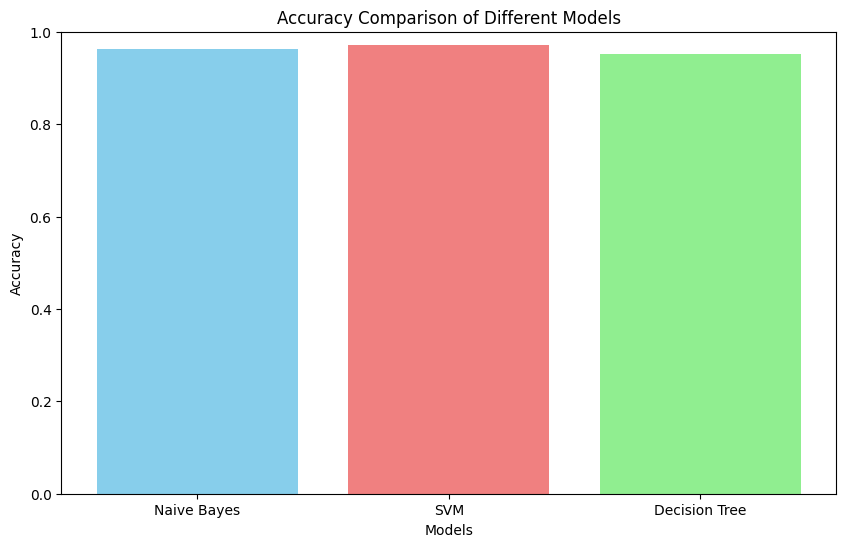

In [ ]:
# prompt: Plot the accuracy of the tree models for comparison

import matplotlib.pyplot as plt

# Accuracy scores from the models (replace with your actual values)
accuracy_scores = {
    'Naive Bayes': accuracy_nb,
    'SVM': accuracy_svc,
    'Decision Tree': accuracy_dt
}

# Model names
models = list(accuracy_scores.keys())
# Accuracy values
accuracies = list(accuracy_scores.values())

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Different Models")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.show()

As we can see, all three of the models are very accurate. The SVM model was the most accurate, correctly predicting *Every* ham message as ham, and predicting 113 out of 145 messages as spam.

The decision tree lagged behind in correctly identifying all ham messages, but outperformed all other models in correctly identifying spam messages. This is because the decision tree predicted *More* messages as spam than all of the other models

Finally, the Naive Bayes model performed just a bit worse than the SVM model. With an accuracy of .96

**In all**, SVM and Decision Trees performed the best for this dataset. Decision Trees would be more recommended for anomaly detection, where you do not want anything to slip through the cracks, so a lower decision threshold would mean that more messages get flagged as spam, leading to more messages being identified as spam, with the consequence of a decreased accuracy in correctly predicting ham messages.

SVM is a good all around model for this, as it correctly predicted 100% of ham messages, and 77% of spam messages as spam.

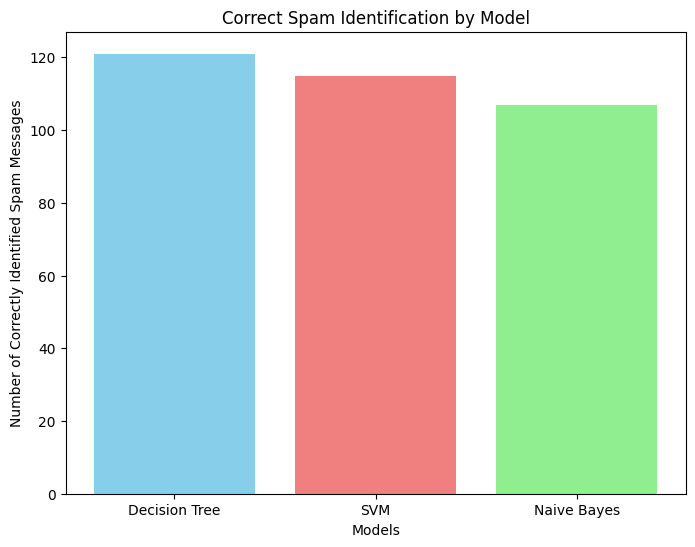

In [ ]:
# prompt: Plot how many correctly identified spam messages each of these models had

import matplotlib.pyplot as plt

# Assuming y_test and y_pred_dt (for example) are available from your model training
# Replace with your actual prediction results for each model

# Example: Get counts of correctly predicted spam messages for each model
# Assuming 1 represents spam in your encoded labels

#Decision Tree
correct_spam_dt = sum((y_test == 1) & (y_pred_dt == 1))
#SVM
correct_spam_svm = sum((y_test == 1) & (y_pred_svc == 1))
#Naive Bayes
correct_spam_nb = sum((y_test == 1) & (y_pred_nb == 1))

# Create the bar plot
models = ['Decision Tree', 'SVM', 'Naive Bayes']
correct_spam_counts = [correct_spam_dt, correct_spam_svm, correct_spam_nb]

plt.figure(figsize=(8, 6))
plt.bar(models, correct_spam_counts, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Models")
plt.ylabel("Number of Correctly Identified Spam Messages")
plt.title("Correct Spam Identification by Model")
plt.show()

#**Additional Testing Of Our Model**

In [ ]:
# prompt: test the model by inputting messages

def predict_message(message):
  # Preprocess the input message
  processed_message = message.lower()
  processed_message = word_tokenize(processed_message)
  processed_message = [re.sub(r'[^a-zA-Z0-9\s]', '', word) for word in processed_message]
  stop_words = set(stopwords.words('english'))
  processed_message = [word for word in processed_message if word not in stop_words and word not in string.punctuation]
  ps = PorterStemmer()
  processed_message = [ps.stem(word) for word in processed_message]
  processed_message = ' '.join(processed_message)

  # Vectorize the processed message
  vectorized_message = vectorizer.transform([processed_message])

  # Make predictions using the SVM model (you can change to other models if needed)
  prediction = svc_classifier.predict(vectorized_message)

  # Decode the prediction
  if prediction[0] == 1:
    return "Spam"
  else:
    return "Ham"


# Example usage
test_messages = [
    "Congratulations! You've won a free prize!",
    "Hi, I wanted to see if you needed some help today at 3 still?",
    "URGENT! Your account has been compromised. Click here to verify.",
    "Meeting at 3 PM today.",
    "I'm so sorry for what I said to you earlier today",
    "Call or text now! Text 111 to opt out."

]

for message in test_messages:
  prediction = predict_message(message)
  print(f"Message: {message}")
  print(f"Prediction: {prediction}\n")

Message: Congratulations! You've won a free prize!
Prediction: Spam

Message: Hi, I wanted to see if you needed some help today at 3 still?
Prediction: Ham

Message: URGENT! Your account has been compromised. Click here to verify.
Prediction: Ham

Message: Meeting at 3 PM today.
Prediction: Ham

Message: I'm so sorry for what I said to you earlier today
Prediction: Ham

Message: QUICK! Join today and win a FREE car if you call back within 20 minutes or less! Act FAST! Offers wont last long!
Prediction: Ham

Message: Call or text now! Text 111 to opt out.
Prediction: Spam

